<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/adam_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

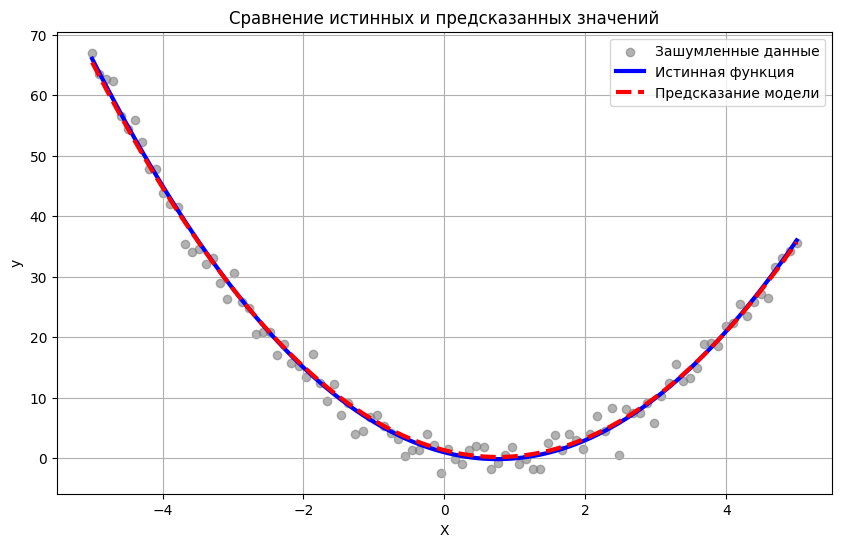

Оптимизированные веса:
Константа: 1.354
Коэффициент при x: -2.972
Коэффициент при x²: 1.968


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерация данных
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y_true = 2 * X**2 - 3 * X + 1
y = y_true + np.random.normal(0, 2, size=X.shape)  # Добавляем шум

# 2. Создание матрицы признаков
X_poly = np.column_stack([
    np.ones_like(X),       # 1
    X,                     # x
    X**2                   # x^2
])

# 3. Adam-оптимизация
def adam_optimizer(X, y, n_iters=1000, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    m = np.zeros(n_features)
    v = np.zeros(n_features)

    for t in range(1, n_iters + 1):
        y_pred = X @ weights
        error = y_pred - y
        grad = (2 / n_samples) * X.T @ error

        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        weights -= lr * m_hat / (np.sqrt(v_hat) + eps)

    return weights

weights = adam_optimizer(X_poly, y)

# 4. Предсказание
y_pred = X_poly @ weights

# 5. Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Зашумленные данные', alpha=0.6, color='gray')
plt.plot(X, y_true, label='Истинная функция', linewidth=3, color='blue')
plt.plot(X, y_pred, label='Предсказание модели', linewidth=3, linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Сравнение истинных и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()

# Вывод коэффициентов
print("Оптимизированные веса:")
print(f"Константа: {weights[0]:.3f}")
print(f"Коэффициент при x: {weights[1]:.3f}")
print(f"Коэффициент при x²: {weights[2]:.3f}")